In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Mental-Health-Twitter.csv")
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [7]:
df.shape

(20000, 11)

In [9]:
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [11]:
df.tail()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0
19999,19999,819334270825197568,Thu Jan 12 00:04:47 +0000 2017,Black holes are where God is dividing by zero.,1169875706,442,230,7,1063601,0,0


In [13]:
df.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

In [15]:
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [17]:
df=df.drop(['Unnamed: 0', 'post_id', 'post_created',  'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets'],axis=1)
df

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1
...,...,...
19995,A day without sunshine is like night.,0
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",0
19997,The flow chart is a most thoroughly oversold p...,0
19998,"Ships are safe in harbor, but they were never ...",0


In [19]:
df=df.sample(frac=1)
df

,post_text,label
9065,@azarkansero @Tauri3l @TheFuxedos @tskimoongod...,1
19236,Readingnetball https://t.co/DE2NjE4DKn,0
18896,User:TDMPaper https://t.co/7sDUNmTnkI,0
15734,German sounds complex.,0
18355,Neil Ackerman is now following me on Twitter! ...,0
...,...,...
13003,@realDonaldTrump Is that your German Blood tal...,0
12558,YOU really can't brief an unintelligent person...,0
18861,User:Yasodabeautysaloon https://t.co/zuhBLQlfsC,0
19579,AAA Intermodal Ephrata Trucking LLC https://t....,0


In [21]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

,post_text,label
0,@azarkansero @Tauri3l @TheFuxedos @tskimoongod...,1
1,Readingnetball https://t.co/DE2NjE4DKn,0
2,User:TDMPaper https://t.co/7sDUNmTnkI,0
3,German sounds complex.,0
4,Neil Ackerman is now following me on Twitter! ...,0
...,...,...
19995,@realDonaldTrump Is that your German Blood tal...,0
19996,YOU really can't brief an unintelligent person...,0
19997,User:Yasodabeautysaloon https://t.co/zuhBLQlfsC,0
19998,AAA Intermodal Ephrata Trucking LLC https://t....,0


In [23]:
df.rename(columns={"post_text":"text"},inplace=True)

In [25]:
df

,text,label
0,@azarkansero @Tauri3l @TheFuxedos @tskimoongod...,1
1,Readingnetball https://t.co/DE2NjE4DKn,0
2,User:TDMPaper https://t.co/7sDUNmTnkI,0
3,German sounds complex.,0
4,Neil Ackerman is now following me on Twitter! ...,0
...,...,...
19995,@realDonaldTrump Is that your German Blood tal...,0
19996,YOU really can't brief an unintelligent person...,0
19997,User:Yasodabeautysaloon https://t.co/zuhBLQlfsC,0
19998,AAA Intermodal Ephrata Trucking LLC https://t....,0


In [27]:
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_13064\2995733368.py:3: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]','',text)
C:\Users\HP\AppData\Local\Temp\ipykernel_13064\2995733368.py:5: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('https?://\S+|www\.\S+','',text)
C:\Users\HP\AppData\Local\Temp\ipykernel_13064\2995733368.py:9: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*','',text)


In [29]:
df["text"]=df["text"].apply(wordopt)
df

,text,label
0,azarkansero thefuxedos tskimoongoddess m...,1
1,readingnetball https t co,0
2,user tdmpaper https t co,0
3,german sounds complex,0
4,neil ackerman is now following me on twitter ...,0
...,...,...
19995,realdonaldtrump is that your german blood tal...,0
19996,you really can t brief an unintelligent person...,0
19997,user yasodabeautysaloon https t co zuhblqlfsc,0
19998,aaa intermodal ephrata trucking llc https t co,0


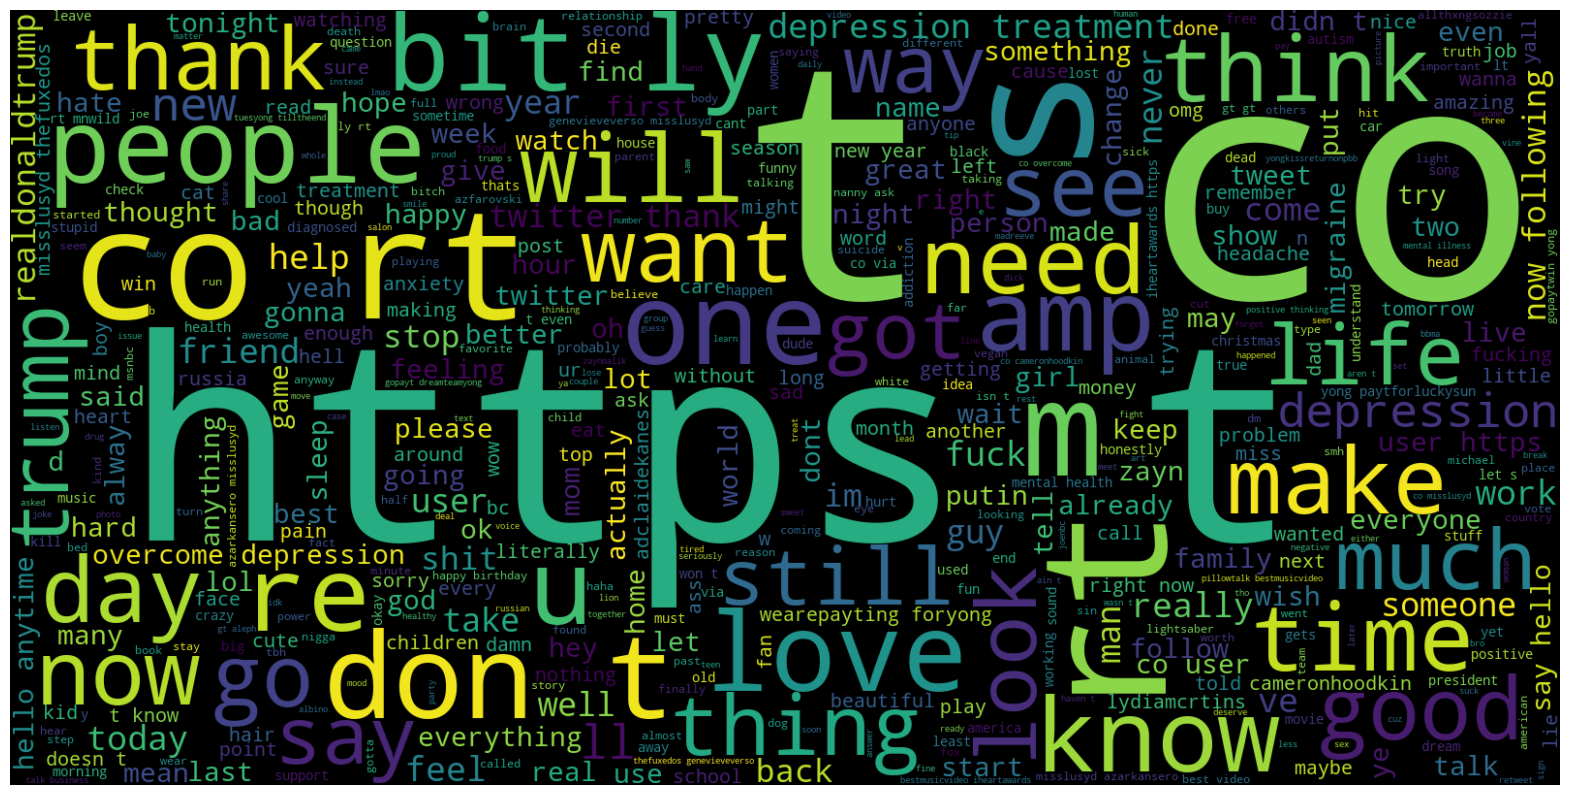

In [31]:
text=' '.join([word for word in df['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
x=df['text']
y=df['label']
print(x)
print(y)

0         azarkansero    thefuxedos  tskimoongoddess  m...
1                             readingnetball https   t co 
2                              user tdmpaper https   t co 
3                                   german sounds complex 
4        neil ackerman is now following me on twitter  ...
                               ...                        
19995     realdonaldtrump is that your german blood tal...
19996    you really can t brief an unintelligent person...
19997      user yasodabeautysaloon https   t co zuhblqlfsc
19998    aaa intermodal ephrata trucking llc https   t co 
19999    i used to gradually increase the heat til it w...
Name: text, Length: 20000, dtype: object
0        1
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    1
Name: label, Length: 20000, dtype: int64


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [37]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(15000,) (5000,) (15000,) (5000,)


In [41]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train) 
xv_test=vectorization.transform(x_test)

In [43]:
xv_train

<15000x20466 sparse matrix of type '<class 'numpy.float64'>'
	with 171863 stored elements in Compressed Sparse Row format>

In [45]:
xv_train.shape

(15000, 20466)

In [47]:
xv_test.shape

(5000, 20466)

In [ ]:
# Logistic Regression

In [49]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [51]:
pred_lr1=LR.predict(xv_test)
pred_lr1

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score

In [55]:
print(accuracy_score(y_test,pred_lr1))

0.8458


In [ ]:
# Naive bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(xv_train,y_train)
predict1 = MNB.predict(xv_test)
predict1

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [59]:
print(accuracy_score(y_test,predict1))

0.869


In [61]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(xv_train,y_train)
predict3 = BNB.predict(xv_test)
predict3

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [63]:
print(accuracy_score(y_test,predict3))

0.8668


In [65]:
RF= RandomForestClassifier(random_state=42)
RF_model=RF.fit(xv_train,y_train)

In [66]:
y_pred_RF1=RF_model.predict(xv_test)
y_pred_RF1

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [68]:
print(accuracy_score(y_test,y_pred_RF1))

0.831


In [ ]:
#SVM

In [72]:
from sklearn.svm import SVC

In [74]:
SVM=SVC(kernel='rbf')
svm_clf= SVC(random_state=42)
svm_model=svm_clf.fit(xv_train,y_train)

In [75]:
y_pred_svm1=svm_model.predict(xv_test)
y_pred_svm1

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [76]:
print(accuracy_score(y_test,y_pred_svm1))

0.8648


In [ ]:
# KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
from sklearn.metrics import accuracy_score
metric_k= []
neighbors = np.arange(3, 15)

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    model=knn.fit(xv_train,y_train)
    y_pred_knn=model.predict(xv_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

In [82]:
metric_k

[0.7972,
 0.7772,
 0.7972,
 0.7958,
 0.8086,
 0.8128,
 0.8158,
 0.8112,
 0.8158,
 0.8114,
 0.8132,
 0.8142]

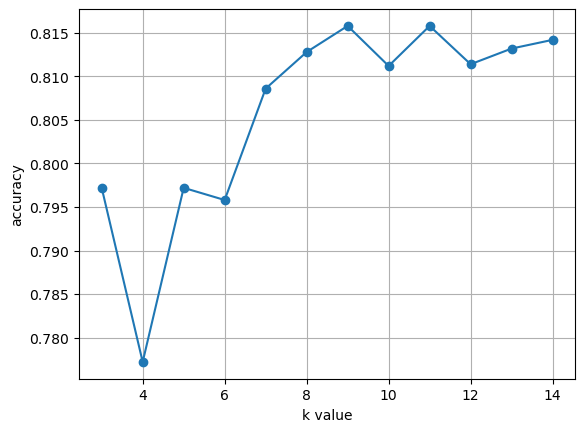

In [84]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [87]:
knn=KNeighborsClassifier(n_neighbors=8)
model=knn.fit(xv_train,y_train)
y_pred_knn=model.predict(xv_test)

In [88]:
print(accuracy_score(y_test,y_pred_knn))

0.8128


In [89]:
pt=[]
for i in[LR,MNB,BNB,SVM,KNN]:
    i.fit(xv_train,y_train)
    pt.append(round(accuracy_score(y_test,i.predict(xv_test))*100,2))
print(pt)

[84.58, 86.9, 86.68, 86.48, 79.72]


In [ ]:
# Sample prediction

In [93]:
pd.set_option('display.max_colwidth', None)

In [95]:
x.head()

0                               azarkansero    thefuxedos  tskimoongoddess  misslusyd yeah then i realized i look like i m  
1                                                                                               readingnetball https   t co 
2                                                                                                user tdmpaper https   t co 
3                                                                                                     german sounds complex 
4    neil ackerman is now following me on twitter  thank you neil ackerman  say hello anytime    https   t co  https   t co 
Name: text, dtype: object

In [97]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [99]:
example = ['''but clean  like a nubian queen''']
example_vectorized = vectorization.transform(example)
result = MNB.predict(example_vectorized)

print(result)
if(result==0):
    print("Negative review")
else:
    print("positive review")

[1]
positive review


In [101]:
example1 = ['''does trump treat press media with respect https   t co''']
example1_vectorized = vectorization.transform(example1)
result = MNB.predict(example1_vectorized)

print(result)
if(result==0):
    print("Negative review")
else:
    print("positive review")

[0]
Negative review
